## DSI-06 Homework 3: ANSWERS
From Chapter 4, found on pages 196-197 of ISLP

*This question should be answered using the `Weekly` data set, which is part of the ISLP package. This data is similar in nature to the Smarket data from this section's in-class exercises, except that it contains 1, 089 weekly returns for 21 years, from the beginning of 1990 to the end of 2010.*

In [9]:
# Import standard libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
import statsmodels.api as sm

# Import specific objects
from ISLP.models import (ModelSpec as MS,
                         summarize)
from ISLP import load_data
from ISLP import confusion_table
from ISLP.models import contrast
from sklearn.discriminant_analysis import \
     (LinearDiscriminantAnalysis as LDA,
      QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load dataset
Weekly = load_data('Weekly')
Weekly

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up
...,...,...,...,...,...,...,...,...,...
1084,2010,-0.861,0.043,-2.173,3.599,0.015,3.205160,2.969,Up
1085,2010,2.969,-0.861,0.043,-2.173,3.599,4.242568,1.281,Up
1086,2010,1.281,2.969,-0.861,0.043,-2.173,4.835082,0.283,Up
1087,2010,0.283,1.281,2.969,-0.861,0.043,4.454044,1.034,Up


a) Produce some numerical and graphical summaries of the `Weekly` data. Do there appear to be any patterns?

In [10]:
# Use the describe() function to obtain basic summary statistics for each variable 
print(Weekly.describe())

              Year         Lag1         Lag2         Lag3         Lag4  \
count  1089.000000  1089.000000  1089.000000  1089.000000  1089.000000   
mean   2000.048669     0.150585     0.151079     0.147205     0.145818   
std       6.033182     2.357013     2.357254     2.360502     2.360279   
min    1990.000000   -18.195000   -18.195000   -18.195000   -18.195000   
25%    1995.000000    -1.154000    -1.154000    -1.158000    -1.158000   
50%    2000.000000     0.241000     0.241000     0.241000     0.238000   
75%    2005.000000     1.405000     1.409000     1.409000     1.409000   
max    2010.000000    12.026000    12.026000    12.026000    12.026000   

              Lag5       Volume        Today  
count  1089.000000  1089.000000  1089.000000  
mean      0.139893     1.574618     0.149899  
std       2.361285     1.686636     2.356927  
min     -18.195000     0.087465   -18.195000  
25%      -1.166000     0.332022    -1.154000  
50%       0.234000     1.002680     0.241000  
75% 

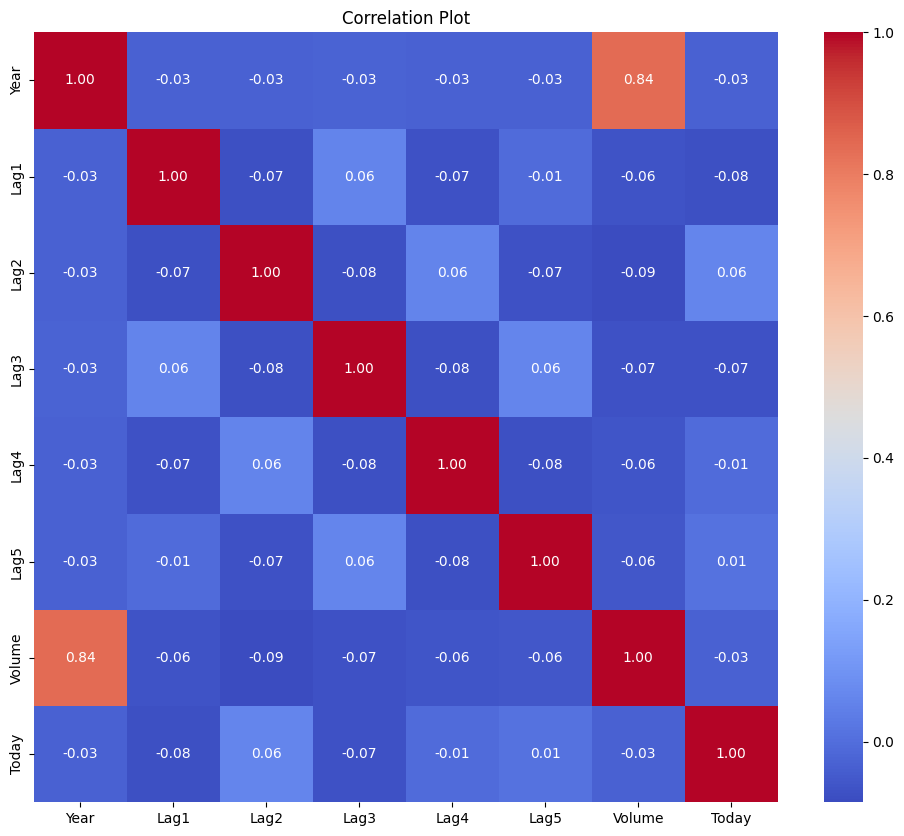

In [11]:
numeric_columns = Weekly.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
cor_Weekly = numeric_columns.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cor_Weekly, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Plot')
plt.show()

We can see a pattern! We have a significant linear relationship between Year and Volume. The correlational plot does not seem to illustrate that any other variables are significantly linearly related.

b) Use the full data set to perform a logistic regression with Direction as the response and the five lag variables plus Volume as predictors. Use the summary function to print the results. Do any of the predictors appear to be statistically significant? If so, which ones?

In [12]:
# Create lag variables
for i in range(1, 6):
    Weekly[f'Lag_{i}'] = Weekly['Direction'].shift(i)

# Drop rows with missing values due to lag creation
Weekly = Weekly.dropna()

# Select predictors and response variable
allvars = Weekly.columns.drop(['Today', 'Direction', 'Year'])
design = sm.add_constant(pd.get_dummies(Weekly[allvars], drop_first=True))
X = design
y = (Weekly['Direction'] == 'Up').astype(int)

# Fit logistic regression model
glm = sm.GLM(y, X, family=sm.families.Binomial())
results = glm.fit()

# Print the summary of the logistic regression
print(results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Direction   No. Observations:                 1084
Model:                            GLM   Df Residuals:                     1072
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -733.41
Date:                Tue, 19 Mar 2024   Deviance:                       1466.8
Time:                        20:47:23   Pearson chi2:                 1.08e+03
No. Iterations:                     4   Pseudo R-squ. (CS):            0.02064
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6979      0.250      2.795      0.0

In [13]:
summarize(results)

,coef,std err,z,P>|z|
const,0.6979,0.250,2.795,0.005
Lag1,0.0072,0.038,0.187,0.852
Lag2,0.1120,0.040,2.766,0.006
Lag3,-0.0278,0.040,-0.702,0.482
Lag4,-0.0504,0.039,-1.300,0.194
Lag5,0.0474,0.038,1.232,0.218
Volume,-0.0184,0.037,-0.493,0.622
Lag_1_Up,-0.3280,0.181,-1.814,0.070
Lag_2_Up,-0.3007,0.184,-1.634,0.102
Lag_3_Up,0.0774,0.183,0.423,0.673


The column labelled Pr(>|z|) gives the p-values associated with each variables. Recall that the p-values
indicate whether or not to reject the null hypothesis that there is no association between the response and
predictor variable. Lag 2 appear to be statistically significant!

c) Compute the confusion matrix and overall fraction of correct predictions. Explain what the confusion matrix is telling you about the types of mistakes made by logistic regression

In [14]:
# Get predicted probabilities
y_prob = results.predict()

# Convert probabilities to binary predictions (0 or 1)
y_pred = (y_prob > 0.5).astype(int)

# Compute confusion matrix
cm = confusion_matrix(y, y_pred)

# Extract values from the confusion matrix
tn, fp, fn, tp = cm.ravel()

# Compute overall fraction of correct predictions (accuracy)
accuracy = accuracy_score(y, y_pred)

# Print confusion matrix and accuracy
print("Confusion Matrix:")
print(pd.DataFrame(cm, columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1']))
print("\nOverall Fraction of Correct Predictions (Accuracy):", accuracy)

Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0          129          353
Actual 1          108          494

Overall Fraction of Correct Predictions (Accuracy): 0.5747232472324724


d) Now fit the logistic regression model using a training data period from 1990 to 2008, with Lag2 as the only predictor. Compute the confusion matrix and the overall fraction of correct predictions for the held out data (that is, the data from 2009 and 2010).

In [22]:
# Filter data for the training period (1990 to 2008)
train_data = Weekly[(Weekly['Year'] >= 1990) & (Weekly['Year'] <= 2008)]

# Filter data for the test period (2009 and 2010)
test_data = Weekly[(Weekly['Year'] == 2009) | (Weekly['Year'] == 2010)]

# Extract predictors and response variables for training
X_train = train_data[['Lag2']]
y_train = train_data['Direction']

# Extract predictors and response variables for testing
X_test = test_data[['Lag2']]
y_test = test_data['Direction']

# Fit logistic regression model on the training data
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

# Get predicted probabilities on the test data
y_prob = logreg_model.predict_proba(X_test)[:, 1]

# Convert probabilities to binary predictions (0 or 1)
y_pred = (y_prob > 0.5).astype(int)

# Convert labels in y_true to numeric values (0 and 1)
y_true_numeric = y_test.map({'Down': 0, 'Up': 1})

# Compute confusion matrix
cm = confusion_matrix(y_true_numeric, y_pred)

# Extract values from the confusion matrix
tn, fp, fn, tp = cm.ravel()

# Compute overall fraction of correct predictions (accuracy)
accuracy = accuracy_score(y_true_numeric, y_pred)

# Print confusion matrix and accuracy
print("Confusion Matrix:")
print(pd.DataFrame(cm, columns=['Predicted Down', 'Predicted Up'], index=['Actual Down', 'Actual Up']))
print("\nOverall Fraction of Correct Predictions (Accuracy):", accuracy)

Confusion Matrix:
             Predicted Down  Predicted Up
Actual Down               9            34
Actual Up                 5            56

Overall Fraction of Correct Predictions (Accuracy): 0.625


e) Repeat (d) using LDA.

In [8]:
# Filter data for the training period (1990 to 2008)
train_data = Weekly[(Weekly['Year'] >= 1990) & (Weekly['Year'] <= 2008)]

# Filter data for the test period (2009 and 2010)
test_data = Weekly[(Weekly['Year'] == 2009) | (Weekly['Year'] == 2010)]

# Extract predictors and response variables for training
X_train = train_data[['Lag2']]
y_train = train_data['Direction']

# Extract predictors and response variables for testing
X_test = test_data[['Lag2']]
y_test = test_data['Direction']

# Fit LDA model on the training data
lda_model = LDA()
lda_model.fit(X_train, y_train)

# Predictions on the test data
y_pred = lda_model.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Extract values from the confusion matrix
tn, fp, fn, tp = cm.ravel()

# Compute overall fraction of correct predictions (accuracy)
accuracy = accuracy_score(y_test, y_pred)

# Print confusion matrix and accuracy
print("Confusion Matrix:")
print(pd.DataFrame(cm, columns=['Predicted Down', 'Predicted Up'], index=['Actual Down', 'Actual Up']))
print("\nOverall Fraction of Correct Predictions (Accuracy):", accuracy)

Confusion Matrix:
             Predicted Down  Predicted Up
Actual Down               9            34
Actual Up                 5            56

Overall Fraction of Correct Predictions (Accuracy): 0.625


f) Repeat (d) using QDA.

In [9]:
# Filter data for the training period (1990 to 2008)
train_data = Weekly[(Weekly['Year'] >= 1990) & (Weekly['Year'] <= 2008)]

# Filter data for the test period (2009 and 2010)
test_data = Weekly[(Weekly['Year'] == 2009) | (Weekly['Year'] == 2010)]

# Extract predictors and response variables for training
X_train = train_data[['Lag2']]
y_train = train_data['Direction']

# Extract predictors and response variables for testing
X_test = test_data[['Lag2']]
y_test = test_data['Direction']

# Fit QDA model on the training data
qda_model = QDA()
qda_model.fit(X_train, y_train)

# Predictions on the test data
y_pred = qda_model.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Extract values from the confusion matrix
tn, fp, fn, tp = cm.ravel()

# Compute overall fraction of correct predictions (accuracy)
accuracy = accuracy_score(y_test, y_pred)

# Print confusion matrix and accuracy
print("Confusion Matrix:")
print(pd.DataFrame(cm, columns=['Predicted Down', 'Predicted Up'], index=['Actual Down', 'Actual Up']))
print("\nOverall Fraction of Correct Predictions (Accuracy):", accuracy)

Confusion Matrix:
             Predicted Down  Predicted Up
Actual Down               0            43
Actual Up                 0            61

Overall Fraction of Correct Predictions (Accuracy): 0.5865384615384616


g) Repeat (d) using KNN with K = 1.

In [10]:
# Filter data for the training period (1990 to 2008)
train_data = Weekly[(Weekly['Year'] >= 1990) & (Weekly['Year'] <= 2008)]

# Filter data for the test period (2009 and 2010)
test_data = Weekly[(Weekly['Year'] == 2009) | (Weekly['Year'] == 2010)]

# Extract predictors and response variables for training
X_train = train_data[['Lag2']]
y_train = train_data['Direction']

# Extract predictors and response variables for testing
X_test = test_data[['Lag2']]
y_test = test_data['Direction']

# Fit KNN model on the training data with K=1
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train, y_train)

# Predictions on the test data
y_pred = knn_model.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Extract values from the confusion matrix
tn, fp, fn, tp = cm.ravel()

# Compute overall fraction of correct predictions (accuracy)
accuracy = accuracy_score(y_test, y_pred)

# Print confusion matrix and accuracy
print("Confusion Matrix:")
print(pd.DataFrame(cm, columns=['Predicted Down', 'Predicted Up'], index=['Actual Down', 'Actual Up']))
print("\nOverall Fraction of Correct Predictions (Accuracy):", accuracy)

Confusion Matrix:
             Predicted Down  Predicted Up
Actual Down              22            21
Actual Up                30            31

Overall Fraction of Correct Predictions (Accuracy): 0.5096153846153846


h) Repeat (d) using naive Bayes.

In [11]:
# Filter data for the training period (1990 to 2008)
train_data = Weekly[(Weekly['Year'] >= 1990) & (Weekly['Year'] <= 2008)]

# Filter data for the test period (2009 and 2010)
test_data = Weekly[(Weekly['Year'] == 2009) | (Weekly['Year'] == 2010)]

# Extract predictors and response variables for training
X_train = train_data[['Lag2']]
y_train = train_data['Direction']

# Extract predictors and response variables for testing
X_test = test_data[['Lag2']]
y_test = test_data['Direction']

# Fit Naive Bayes model on the training data
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)

# Predictions on the test data
y_pred = naive_bayes_model.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Extract values from the confusion matrix
tn, fp, fn, tp = cm.ravel()

# Compute overall fraction of correct predictions (accuracy)
accuracy = accuracy_score(y_test, y_pred)

# Print confusion matrix and accuracy
print("Confusion Matrix:")
print(pd.DataFrame(cm, columns=['Predicted Down', 'Predicted Up'], index=['Actual Down', 'Actual Up']))
print("\nOverall Fraction of Correct Predictions (Accuracy):", accuracy)

Confusion Matrix:
             Predicted Down  Predicted Up
Actual Down               0            43
Actual Up                 0            61

Overall Fraction of Correct Predictions (Accuracy): 0.5865384615384616


i) Which of these methods appears to provide the best results on this data?

*Given the accuracy and test error rate, the Linear Discriminant Analysis, Quadratic Discriminant Analysis, and logistic regression model performed the best (accuracy of 62.5%, test error of 37.5%).*

j) Experiment with different combinations of predictors, including possible transformations and interactions, for each of the methods. Report the variables, method, and associated confusion matrix that appears to provide the best results on the held out data. Note that you should also experiment with values for K in the KNN classifier.

Examples: Logistic regression with interaction

In [12]:
# Convert 'Direction' to numeric format
label_encoder = LabelEncoder()
Weekly['Direction_numeric'] = label_encoder.fit_transform(Weekly['Direction'])

# Split the data into training and testing sets
train_data, test_data = train_test_split(Weekly, test_size=0.2, random_state=16)

# Fit logistic regression model with interaction term on the training data
formula = 'Direction_numeric ~ Lag2 * Lag4'
log_fit_interaction = sm.Logit.from_formula(formula, data=train_data).fit()

# Predict probabilities on the test data
log_probs_interaction = log_fit_interaction.predict(test_data)

# Convert probabilities to binary predictions (0 or 1)
log_pred = (log_probs_interaction > 0.5).astype(int)

# Decode numeric predictions back to original labels
log_pred_labels = label_encoder.inverse_transform(log_pred)

# Create a confusion matrix
cm = confusion_matrix(test_data['Direction'], log_pred_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(pd.DataFrame(cm, columns=['Predicted Down', 'Predicted Up'], index=['Actual Down', 'Actual Up']))

Optimization terminated successfully.
         Current function value: 0.683752
         Iterations 4
Confusion Matrix:
             Predicted Down  Predicted Up
Actual Down               5            92
Actual Up                 4           116


/var/folders/51/b8ym03ns147cjmm4gt5_l48h0000gn/T/ipykernel_6858/4110084365.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Weekly['Direction_numeric'] = label_encoder.fit_transform(Weekly['Direction'])


Example: KNN, $K = 10$

In [13]:
# Filter data for the training period (1990 to 2008)
train_data = Weekly[(Weekly['Year'] >= 1990) & (Weekly['Year'] <= 2008)]

# Filter data for the test period (2009 and 2010)
test_data = Weekly[(Weekly['Year'] == 2009) | (Weekly['Year'] == 2010)]

# Extract predictors and response variables for training
X_train = train_data[['Lag2']]
y_train = train_data['Direction']

# Extract predictors and response variables for testing
X_test = test_data[['Lag2']]
y_test = test_data['Direction']

# Fit KNN model on the training data with K=1
knn_model = KNeighborsClassifier(n_neighbors=10)
knn_model.fit(X_train, y_train)

# Predictions on the test data
y_pred = knn_model.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Extract values from the confusion matrix
tn, fp, fn, tp = cm.ravel()

# Compute overall fraction of correct predictions (accuracy)
accuracy = accuracy_score(y_test, y_pred)

# Print confusion matrix and accuracy
print("Confusion Matrix:")
print(pd.DataFrame(cm, columns=['Predicted Down', 'Predicted Up'], index=['Actual Down', 'Actual Up']))
print("\nOverall Fraction of Correct Predictions (Accuracy):", accuracy)

Confusion Matrix:
             Predicted Down  Predicted Up
Actual Down              22            21
Actual Up                25            36

Overall Fraction of Correct Predictions (Accuracy): 0.5576923076923077
